# تحلیل اکتشافی داده‌ها با دیتاست تایتانیک

##مقدمات

In [1]:
#کتابخانه‌ها
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [2]:
# تنظیم مقادیر پیش‌فرض برای پارامترهای بصری
plt.rcParams['figure.figsize'] = (6,3)
plt.rcParams['figure.dpi'] = 80

In [3]:
#ارتباط با دیتاست
Data = sns.load_dataset('titanic')

In [4]:
# نمایش پنج سطر اول
Data.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [5]:
#اندازه‌ی سطوح و ردیف‌های دیتاست
Data.shape

(891, 15)

In [6]:
#عنوان ستون‌ها
cols = Data.columns
cols

Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'deck', 'embark_town',
       'alive', 'alone'],
      dtype='object')

In [7]:
#آمار توصیفی
Data.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [8]:
# بررسی وضعیت کلی داده‌ها
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


##نقشه حرارتی

In [9]:
#اعمال تم عمومی
plt.style.use('ggplot')

In [10]:
#تعداد مقادیر خالی
Data.isnull().sum()

,0
survived,0
pclass,0
sex,0
age,177
sibsp,0
parch,0
fare,0
embarked,2
class,0
who,0


<Axes: >

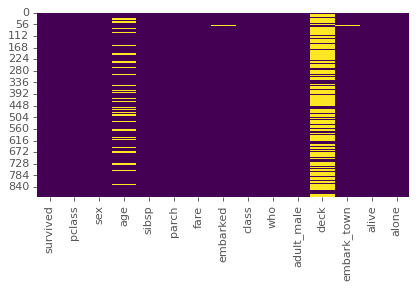

In [11]:
#طراحی یک نقشه حرارتی برای نمایش میزان سطور خالی هر ستون
sns.heatmap(Data.isnull(),cmap = 'viridis', cbar = False)

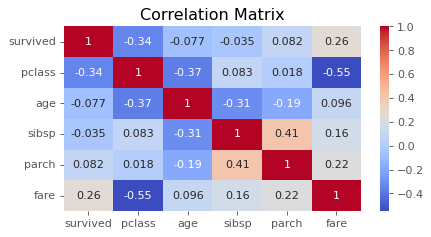

In [12]:
#ماتریس همبستگی میان داده‌ها
data_numeric = Data.select_dtypes(include=['float64', 'int64'])

corrmat = data_numeric.corr()
sns.heatmap(corrmat, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

## تحلیل تک متغیره

In [13]:
#لیست فیلدهای داده‌ها
list(cols)

['survived',
 'pclass',
 'sex',
 'age',
 'sibsp',
 'parch',
 'fare',
 'embarked',
 'class',
 'who',
 'adult_male',
 'deck',
 'embark_town',
 'alive',
 'alone']

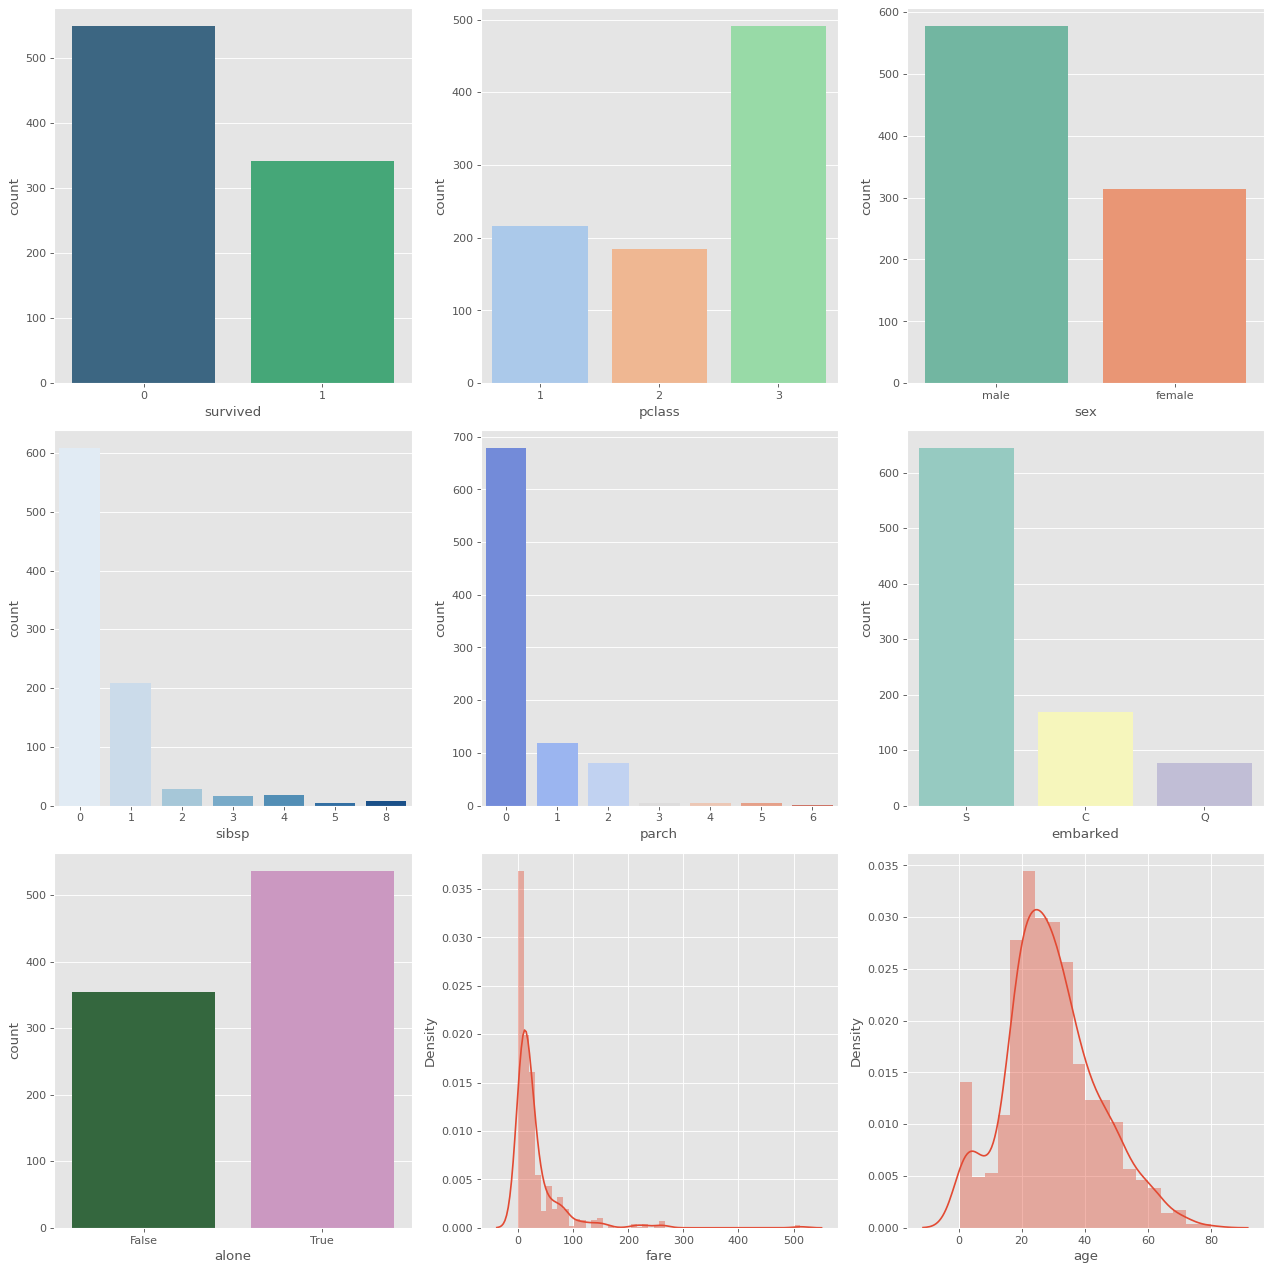

In [14]:
#نمودارهای تحلیلی با یک متغیر واحد
fig, ax = plt.subplots(3,3,figsize=(16,16))
sns.countplot(x = 'survived',data=Data,ax=ax[0][0], palette='viridis')
sns.countplot(x = 'pclass',data=Data,ax=ax[0][1], palette='pastel')
sns.countplot(x = 'sex',data=Data,ax=ax[0][2], palette='Set2')
sns.countplot(x = 'sibsp',data=Data,ax=ax[1][0], palette='Blues')
sns.countplot(x = 'parch',data=Data,ax=ax[1][1], palette='coolwarm')
sns.countplot(x = 'embarked',data=Data,ax=ax[1][2], palette='Set3')
sns.countplot(x = 'alone',data=Data,ax=ax[2][0], palette='cubehelix')

sns.distplot(Data['fare'], kde=True, ax=ax[2][1])
sns.distplot(Data['age'], kde=True, ax=ax[2][2])

plt.tight_layout()

## تحلیل کلاس به کلاس

###Survived

In [15]:
#تعداد بازماندگان و تعداد غرق‌شدگان
Data['survived'].value_counts()

,count
survived,
0,549
1,342


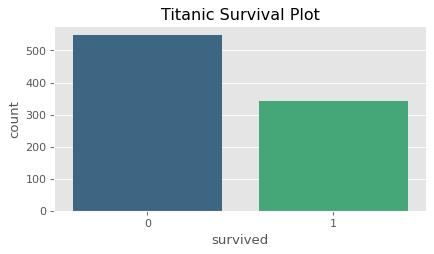

In [16]:
#نمودار بازماندگان
sns.countplot(x = 'survived',data=Data, palette='viridis')
plt.title('Titanic Survival Plot')
plt.show()

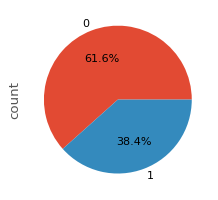

In [17]:
# نرخ مرگ در تایتانیک
Data['survived'].value_counts().plot.pie(autopct='%1.1f%%')
plt.show()

###Pclass


In [18]:
#تعداد فیلدهای سه کلاس مسافر
Data['pclass'].value_counts()

,count
pclass,
3,491
1,216
2,184


In [19]:
# گروه‌بندی داده‌ها بر اساس کلاس مسافری و شمارش تعداد مقادیر زنده‌مانده
Data.groupby('pclass')['survived'].value_counts()

pclass  survived
1       1           136
        0            80
2       0            97
        1            87
3       0           372
        1           119
Name: count, dtype: int64

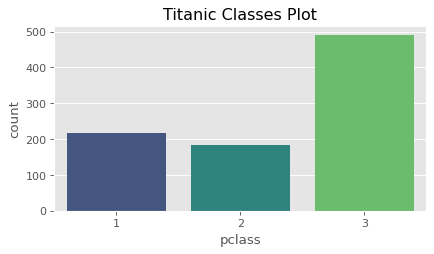

In [20]:
# رسم نمودار تعداد کلاس‌های مسافری با استفاده از کتابخانه سیبورن
sns.countplot(x = 'pclass',data=Data, palette='viridis')
plt.title('Titanic Classes Plot')
plt.show()

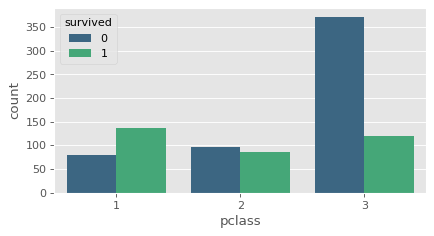

In [21]:
# رسم نمودار تعداد کلاس‌های مسافری همراه با نمایش وضعیت زنده‌مانده به صورت گروه‌بندی شده
# تاثیر کلاس مسافران بر نرخ مرگ و میرشان کاملا مشهود است
sns.countplot(x = 'pclass',hue='survived',data=Data, palette='viridis')
plt.show()

<Axes: ylabel='count'>

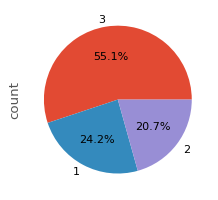

In [22]:
# محاسبه تعداد مسافران در هر کلاس و رسم نمودار دایره‌ای با نمایش درصدها
Data['pclass'].value_counts().plot.pie(autopct="%1.1f%%")

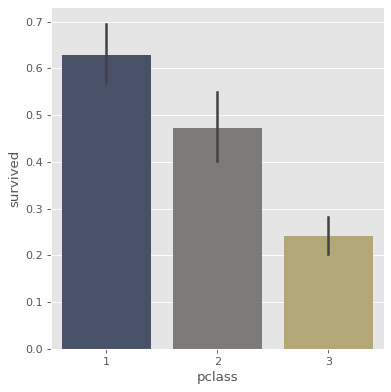

In [23]:
# رسم نمودار میله‌ای برای نمایش نرخ زنده‌ماندن در هر کلاس مسافری
# نرخ زنده ماندن مسافر با توجه به طبقه او نسبت مستقیم دارد
sns.catplot(x = 'pclass', y= 'survived', kind = 'bar', data = Data, palette='cividis')

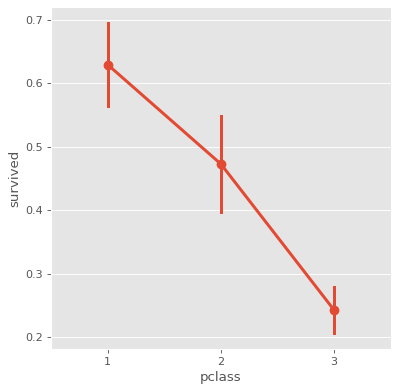

In [24]:
# رسم نمودار نقطه‌ای برای نمایش میانگین نرخ زنده‌ماندن در هر کلاس مسافری
sns.catplot(x = 'pclass', y='survived', kind='point', data=Data)

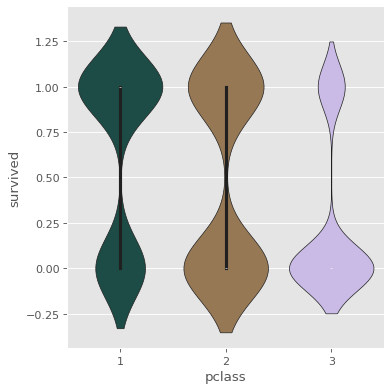

In [25]:
# رسم نمودار ویولن برای نمایش توزیع نرخ زنده‌ماندن در هر کلاس مسافری
sns.catplot(x = 'pclass', y = 'survived', kind='violin', data=Data, palette='cubehelix')

###Sex

In [26]:
# شمارش تعداد مقادیر مربوط به جنسیت در داده‌ها
Data['sex'].value_counts()

,count
sex,
male,577
female,314


<Axes: xlabel='sex', ylabel='count'>

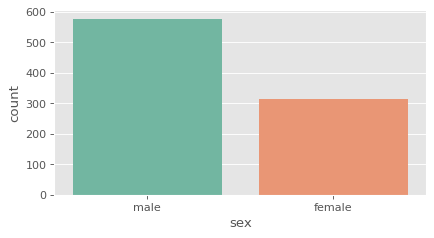

In [27]:
# رسم نمودار تعداد مقادیر جنسیت
sns.countplot(x= 'sex',data=Data, palette="Set2")

In [28]:
# گروه‌بندی داده‌ها بر اساس جنسیت و وضعیت زنده‌مانده و شمارش تعداد مقادیر زنده‌مانده در هر گروه
Data.groupby(['sex', 'survived'])['survived'].count()

sex     survived
female  0            81
        1           233
male    0           468
        1           109
Name: survived, dtype: int64

<Axes: xlabel='sex', ylabel='count'>

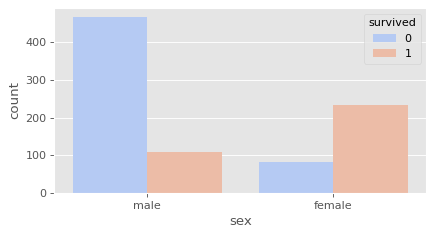

In [29]:
# رسم نمودار تعداد مقادیر جنسیت با تفکیک وضعیت زنده‌مانده
sns.countplot(x= 'sex',hue='survived',data=Data, palette="coolwarm")

<Axes: ylabel='count'>

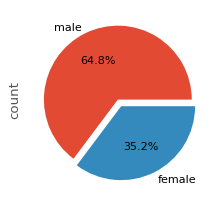

In [30]:
# رسم نمودار دایره‌ای برای نمایش درصد مقادیر جنسیت
explode = [0,0.1]
Data['sex'].value_counts().plot.pie(explode= explode, autopct='%1.1f%%')

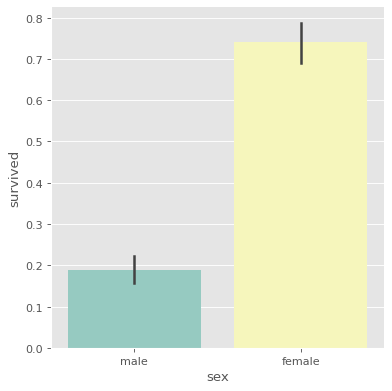

In [31]:
# رسم نمودار میله‌ای برای نمایش نرخ زنده‌ماندن بر اساس جنسیت
sns.catplot(x = 'sex', y='survived',kind='bar', data = Data, palette='Set3')

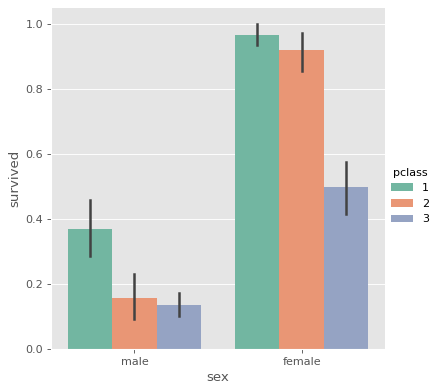

In [32]:
# رسم نمودار میله‌ای برای نمایش نرخ زنده‌ماندن بر اساس جنسیت
# و تفکیک داده‌ها بر اساس کلاس مسافری
# تاثیر جنسیت بر نرخ بقا بیشتر از تاثیر کلاس مسافر است
sns.catplot(x = 'sex', y='survived', hue='pclass',kind='bar', data = Data, palette='Set2')

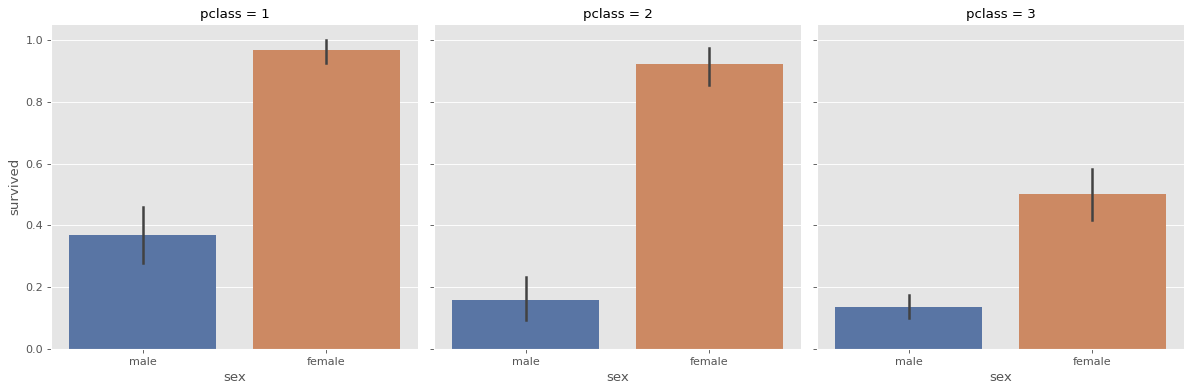

In [33]:
# رسم نمودار میله‌ای برای نمایش نرخ زنده‌ماندن بر اساس جنسیت
# با تفکیک داده‌ها بر اساس کلاس مسافری
# تاثیر کلاس مسافر در بقا غیرقابل چشم‌پوشی است
sns.catplot(x = 'sex', y='survived', col='pclass',kind='bar', data = Data, palette='deep')

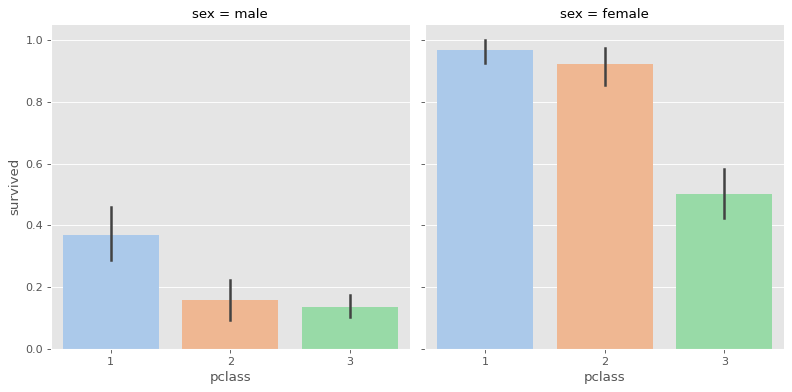

In [34]:
# رسم نمودار میله‌ای برای نمایش نرخ زنده‌ماندن بر اساس کلاس مسافری
# با تفکیک داده‌ها بر اساس جنسیت
# امکان بقای مردان در بهترین حالت نیز بیشتر به صفر نزدیک است تا به یک
sns.catplot(x = 'pclass', y='survived', col='sex',kind='bar', data = Data, palette='pastel')

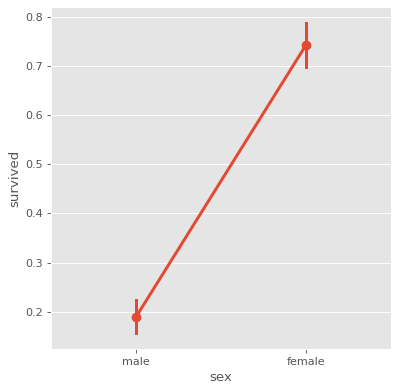

In [35]:
# رسم نمودار نقطه‌ای برای نمایش میانگین نرخ زنده‌ماندن بر اساس جنسیت
# با کمک نمودار نقطه‌ای می‌توان تفاوت فاحش میانگین احتمال بقای زنان و مردان را مشاهده کرد
sns.catplot(x = 'sex',y='survived', kind = 'point', data = Data)

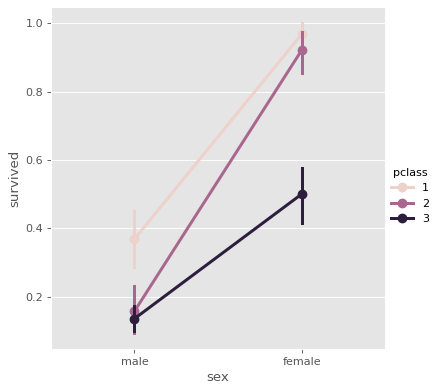

In [36]:
# رسم نمودار نقطه‌ای برای نمایش میانگین نرخ زنده‌ماندن بر اساس جنسیت
# با تفکیک داده‌ها بر اساس کلاس مسافری
# با کاهش کیفیت کلاس، تفاوت میانگین احتمال بقا بین جنسیت‌ها کم‌تر می‌شود
sns.catplot(x = 'sex',y='survived',hue='pclass', kind = 'point', data = Data)

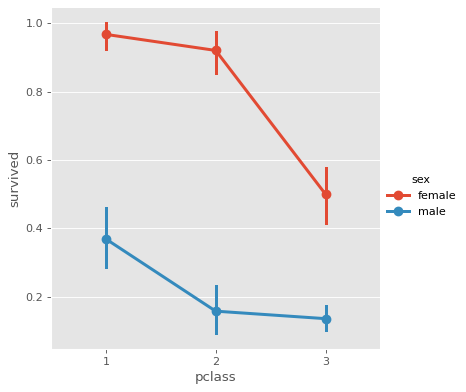

In [37]:
# رسم نمودار نقطه‌ای برای نمایش میانگین نرخ زنده‌ماندن بر اساس کلاس مسافری
# با تفکیک داده‌ها بر اساس جنسیت
# تاثیر کلاس مسافر بر مرگ او، در مسافران مونث بسیار بیشتر از مسافران مذکر است
sns.catplot(x = 'pclass',y='survived',hue='sex', kind = 'point', data = Data)

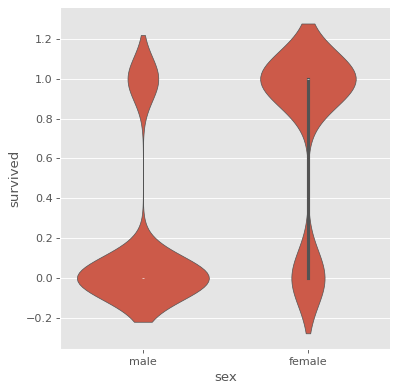

In [38]:
# رسم نمودار ویولن برای نمایش توزیع نرخ زنده‌ماندن بر اساس جنسیت
sns.catplot(x = 'sex',y='survived',kind='violin',data=Data)

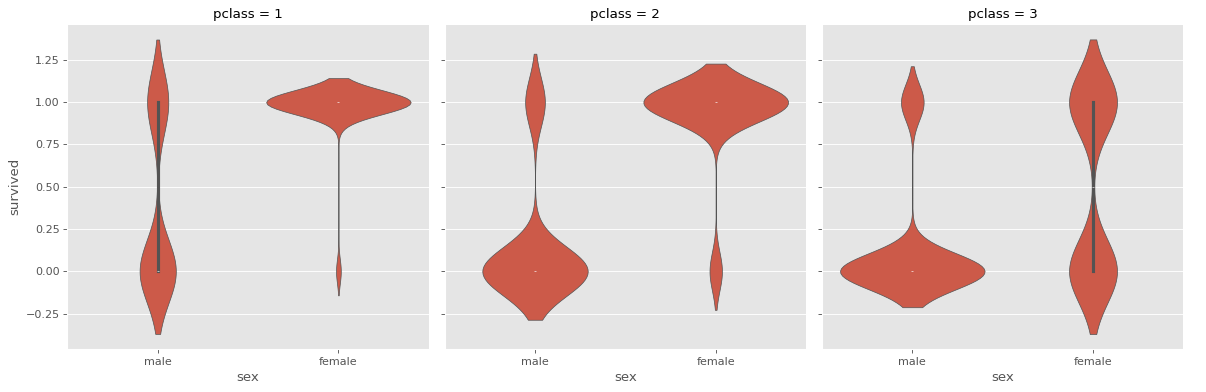

In [39]:
# رسم نمودار ویولن برای نمایش توزیع نرخ زنده‌ماندن بر اساس جنسیت
# با تفکیک داده‌ها بر اساس کلاس مسافری
# توزیع نرخ زنده‌مانده‌گان مرد در طبقه برتر متعادل است
# اما هرچه طبقه ضعیف‌تر می‌شود این تعادل بیشتر به هم می‌خورد
# این مساله برای خانم‌ها معکوس است
sns.catplot(x = 'sex',y='survived',col='pclass',kind='violin',data=Data)

###Age

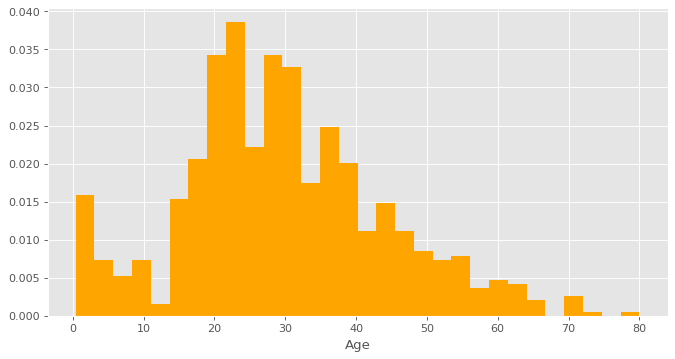

In [40]:
# رسم هیستوگرام برای نمایش توزیع سن و نرمال‌سازی داده‌ها
Data['age'].hist(bins= 30, density=True, color='orange', figsize = (10,5))
plt.xlabel('Age')
plt.show()

<Axes: xlabel='age', ylabel='Density'>

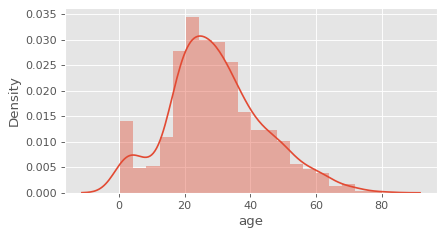

In [41]:
# رسم نمودار توزیع برای داده‌های سن
sns.distplot(Data.age)

<Axes: xlabel='age', ylabel='Density'>

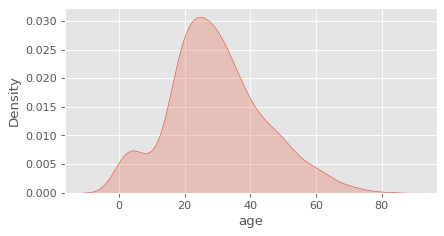

In [42]:
# رسم نمودار چگالی احتمال برای داده‌های سن
# به راحتی میانگین سنی مسافران قابل رویت است
sns.kdeplot(Data.age, shade=True)

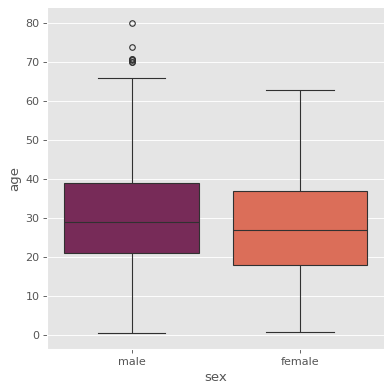

In [43]:
# رسم نمودار جعبه‌ای برای نمایش توزیع سن بر اساس جنسیت
# میانگین سنی زن‌ها کمتر از میانگین سنی مردهاست
sns.catplot(x= 'sex', y= 'age', data=Data, kind= 'box', palette= 'rocket')

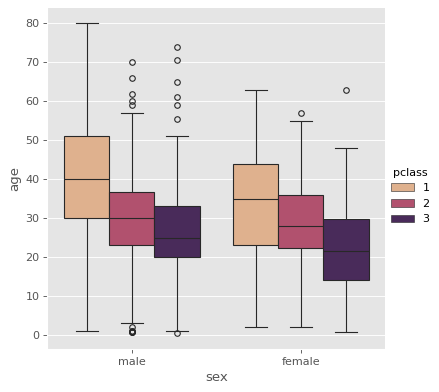

In [44]:
# رسم نمودار جعبه‌ای برای نمایش توزیع سن بر اساس جنسیت
# با تفکیک داده‌ها بر اساس کلاس مسافری
# میانگین سنی مردها در هر کلاسی از زن‌ها بیشتر است
# هر چه کلاس بهتر باشد، میانگین سن مسافران با هر جنسیتی بیشتر است
sns.catplot(x= 'sex', y = 'age', hue = 'pclass', data=Data, kind= 'box', palette= 'flare')

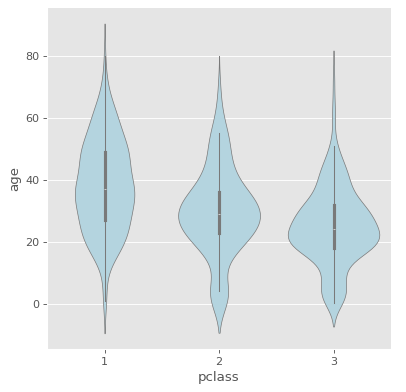

In [45]:
# رسم نمودار ویولن برای نمایش توزیع سن بر اساس کلاس مسافری
# میانگین کلاس سه بسیار جوان است.
# امکان موفقیت مالی و اقتصادی با سن نسبت مستقیم دارد
sns.catplot(x = 'pclass', y = 'age', data = Data, kind = 'violin', color = 'lightblue')

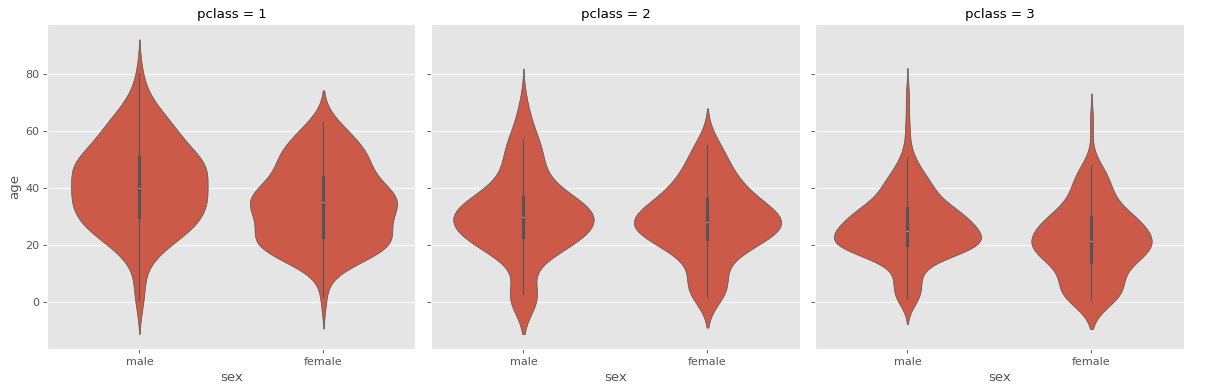

In [46]:
# رسم نمودار ویولن برای نمایش توزیع سن بر اساس جنسیت
# با تفکیک داده‌ها بر اساس کلاس مسافری
# تفاوت میانگین سنی بین جنسیت‌ها در هر کلاس به ترتیب کاهش میابد
sns.catplot(x = 'sex', y = 'age', col='pclass', data = Data, kind = 'violin')

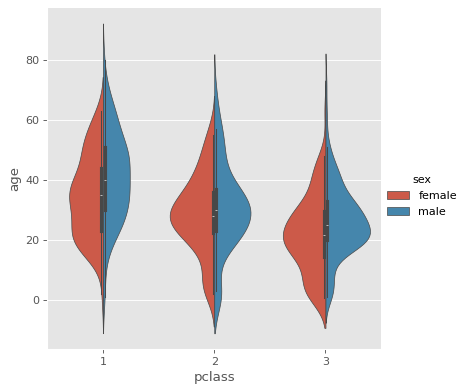

In [47]:
# رسم نمودار ویولن برای نمایش توزیع سن بر اساس کلاس مسافری
# با تفکیک داده‌ها بر اساس جنسیت و تقسیم نمودار به دو قسمت برای هر جنسیت
sns.catplot(x = 'pclass', y = 'age', hue='sex', data = Data, kind = 'violin', split = True)

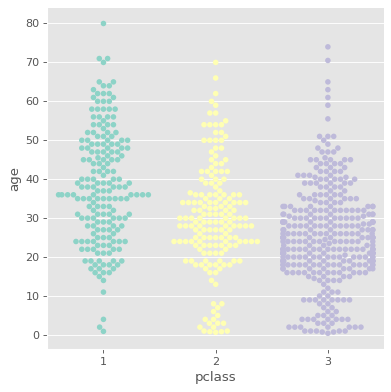

In [48]:
# رسم نمودار زنبوری برای نمایش توزیع سن بر اساس کلاس مسافری
# هرچه طبقه ضعیف‌تر می‌شود نابرابری توزیع نیز بیشتر می‌شود
sns.catplot(x = 'pclass', y='age', kind= 'swarm', data = Data, palette = 'Set3')

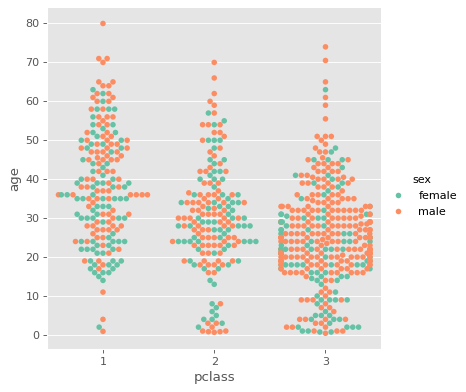

In [49]:
# رسم نمودار زنبوری برای نمایش توزیع سن بر اساس کلاس مسافری
# با تفکیک داده‌ها بر اساس جنسیت
# در هر طبقه میانسال‌ترین افراد مرد هستند
# برابری جنسیتی در تجمع سنی فارغ از طبقه تشریفاتی، تقریبا مساوی است
sns.catplot(x = 'pclass', y='age', hue = 'sex', kind= 'swarm', data = Data, palette = 'Set2')

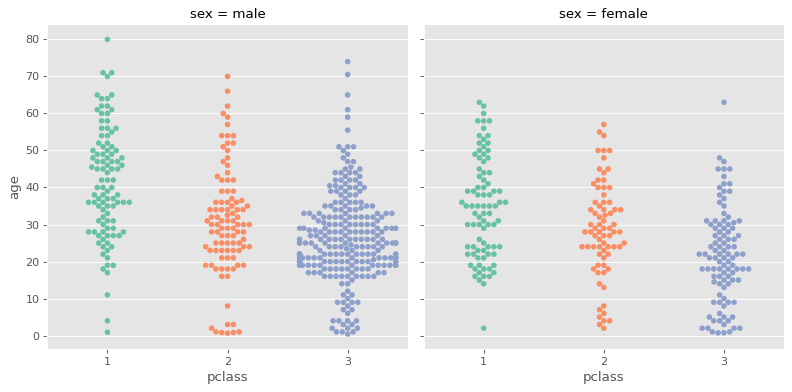

In [50]:
# رسم نمودار زنبوری برای نمایش توزیع سن بر اساس کلاس مسافری
# با تفکیک داده‌ها بر اساس جنسیت و نمایش جداگانه برای هر جنسیت
# نمایش بهتر قاعده سن بالاتر = طبقه مرفه‌تر
sns.catplot(x = 'pclass', y='age', col = 'sex', kind= 'swarm', data = Data, palette = 'Set2')

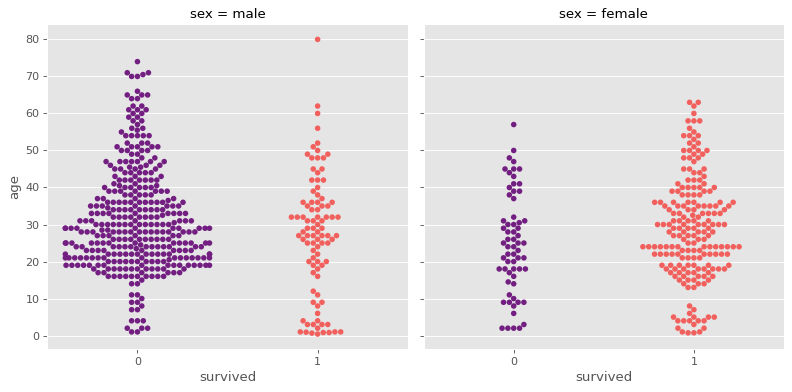

In [51]:
# رسم نمودار زنبوری برای نمایش توزیع سن بر اساس وضعیت زنده‌مانده
# با تفکیک داده‌ها بر اساس جنسیت و نمایش جداگانه برای هر جنسیت
# مردهای جوان بیشتر و کودکان پسر کمترین میزان مرگ را داشتند
sns.catplot(x='survived', y='age', col = 'sex', data = Data, kind = 'swarm', palette='magma')

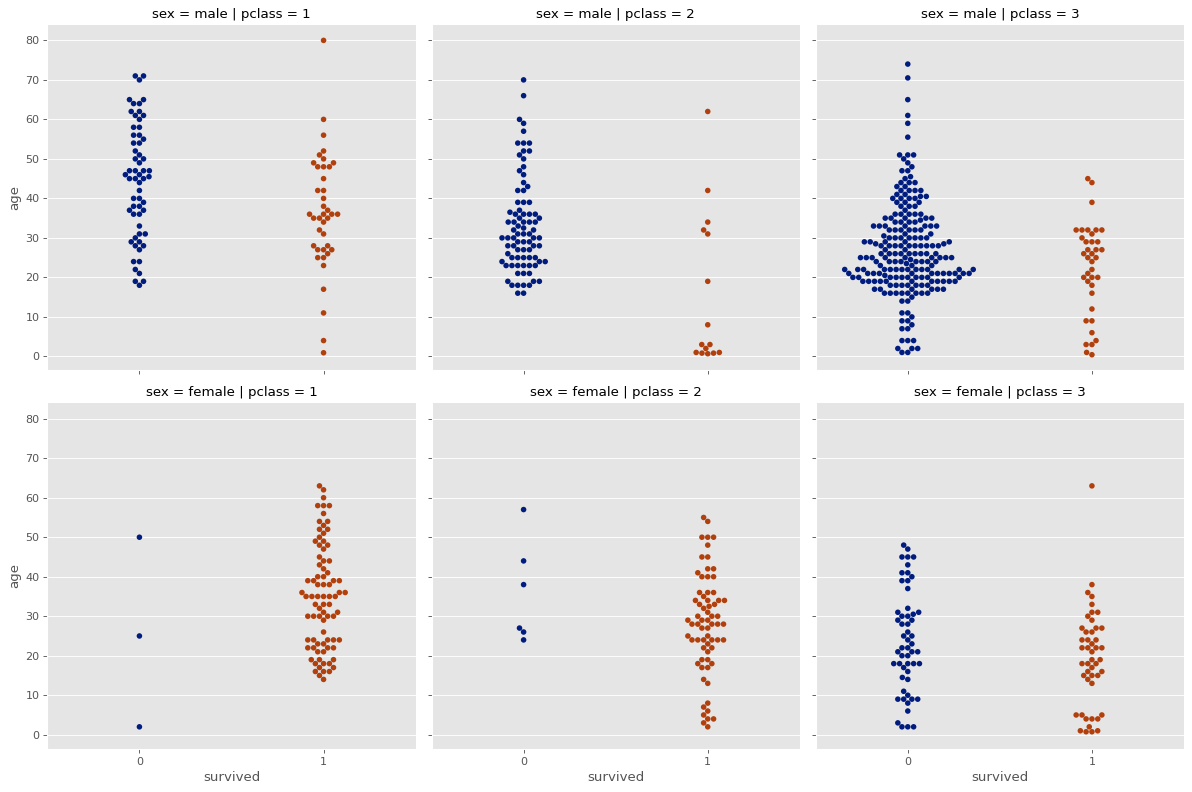

In [52]:
# رسم نمودار زنبوری برای نمایش توزیع سن  بر اساس وضعیت زنده‌مانده
# با تفکیک داده‌ها بر اساس جنسیت و کلاس مسافری
# نمایش جداگانه برای هر ترکیب از جنسیت و کلاس مسافری
# تفاوت فاحش تاثیر جنسیت و کلاس بر احتمال بقا
# هرچه طبقه بهتر باشد احتمال بقا بالاتر است
# احتمال بقای زنان بیشتر است
# احتمال مرگ جوان‌ترها در کلاس‌های بالاتر کمتر است
sns.catplot(x='survived', y='age',row='sex', col = 'pclass', data = Data, kind = 'swarm', palette='dark')

###Fare

<Axes: >

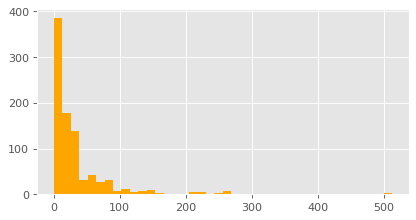

In [53]:
# رسم هیستوگرام برای نمایش توزیع کرایه
Data['fare'].hist(bins = 40, color = 'orange')

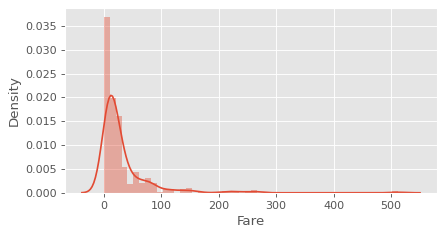

In [54]:
# رسم نمودار توزیع برای داده‌های کرایه
sns.distplot(Data['fare'])
plt.xlabel('Fare')
plt.show()

<Axes: xlabel='fare', ylabel='Density'>

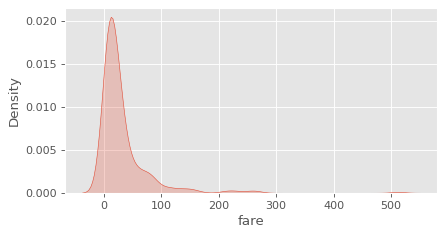

In [55]:
# رسم نمودار چگالی احتمال برای داده‌های کرایه با رنگ‌آمیزی پر شده
# نابرابری توزیع و تجمع نقطه‌ای درمورد هزینه سفر
sns.kdeplot(Data.fare, shade = True)

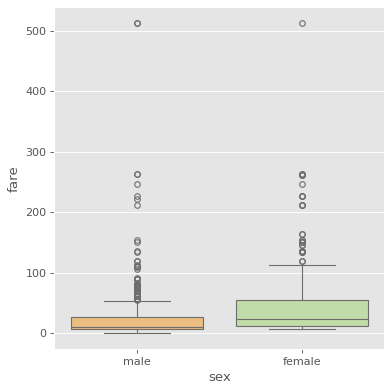

In [56]:
# رسم نمودار جعبه‌ای برای نمایش توزیع کرایه بر اساس جنسیت
# زن‌ها به نسبت مردان هزینه بیشتری پرداخت کرده‌اند
sns.catplot(x = 'sex', y= 'fare', data = Data, kind = 'box', palette = 'Spectral')

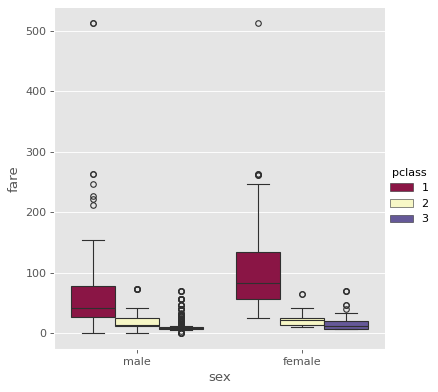

In [57]:
# رسم نمودار جعبه‌ای برای نمایش توزیع کرایه بر اساس جنسیت
# با تفکیک داده‌ها بر اساس کلاس مسافری
# زن‌ها در هر طبقه‌ای بیشتر از مردان هزینه پرداخته‌اند
sns.catplot(x = 'sex', y= 'fare', hue='pclass', data = Data, kind = 'box', palette = 'Spectral')

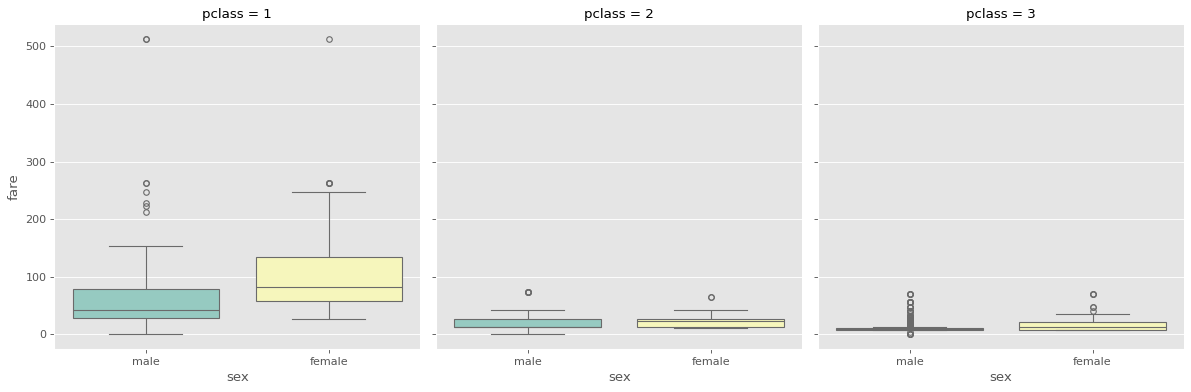

In [58]:
# رسم نمودار جعبه‌ای برای نمایش توزیع کرایه بر اساس جنسیت
# با تفکیک داده‌ها بر اساس کلاس مسافری و نمایش جداگانه برای هر کلاس
# طبقه مسافر با تفاوت پرداخت هزینه براساس جنسیت نسبت دارد
# هرچه کلاس بهتر باشد فاصله هزینه پرداختی زنان با مردان بیشتر است
sns.catplot(x = 'sex', y= 'fare', col='pclass', data = Data, kind = 'box', palette = 'Set3')

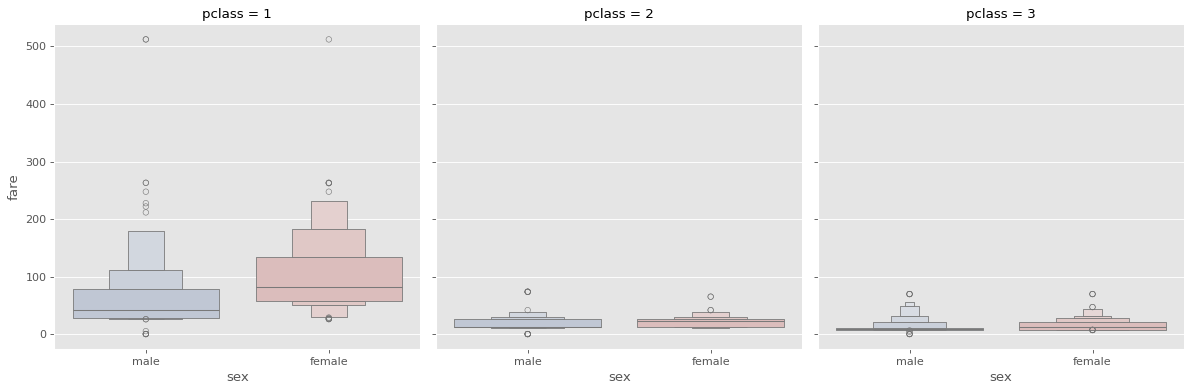

In [59]:
# رسم نمودار جعبه‌ای برای نمایش توزیع کرایه بر اساس جنسیت
# با تفکیک داده‌ها بر اساس کلاس مسافری و نمایش جداگانه برای هر کلاس
# کلاس ۱ بیشتر از سایر کلاس ها هزینه پرداخت کرده
# هزینه سایر کلاس‌ها تقریبا یکسان بوده
sns.catplot(x='sex', y = 'fare', col='pclass', kind='boxen', data = Data, palette = 'vlag')

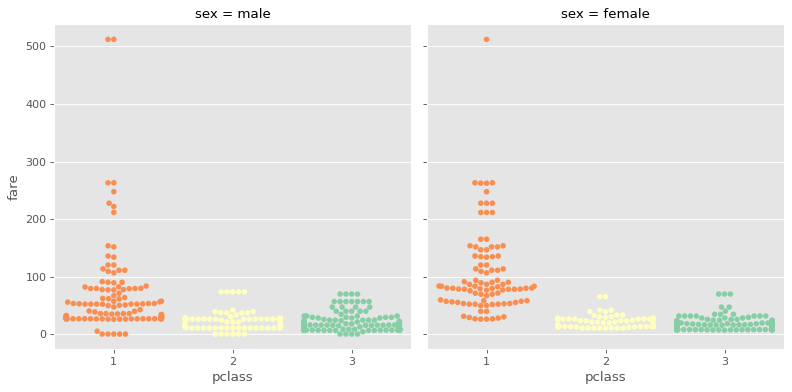

In [60]:
# رسم نمودار زنبوری برای نمایش توزیع کرایه بر اساس کلاس مسافری
# با تفکیک داده‌ها بر اساس جنسیت و نمایش جداگانه برای هر جنسیت
# مسافرانی در کلاس ۱ با پرداخت مبالغ زیاد از امکانات ویژه برخوردار بوده‌اند
sns.catplot(x='pclass', y = 'fare', col='sex', kind='swarm', data = Data, palette = 'Spectral')

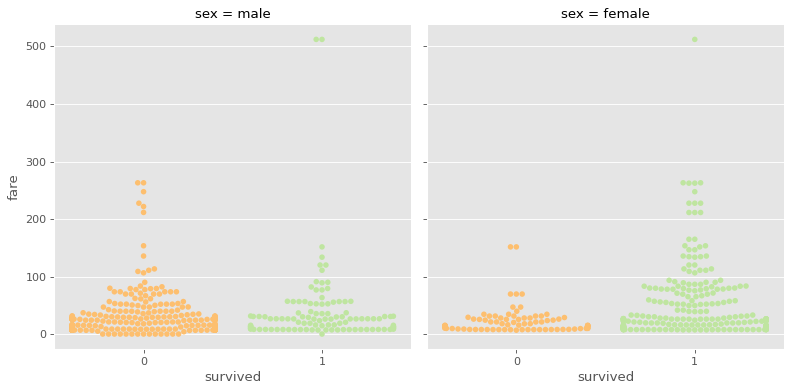

In [61]:
# رسم نمودار زنبوری برای نمایش توزیع کرایه بر اساس وضعیت زنده‌مانده
# با تفکیک داده‌ها بر اساس جنسیت و نمایش جداگانه برای هر جنسیت
# مسافرانی که هزینه بالایی کرده بودند فارغ از جنسیت بصورت قطعی زنده مانده‌اند
sns.catplot(x='survived', y = 'fare', col='sex', kind='swarm', data = Data, palette = 'Spectral')

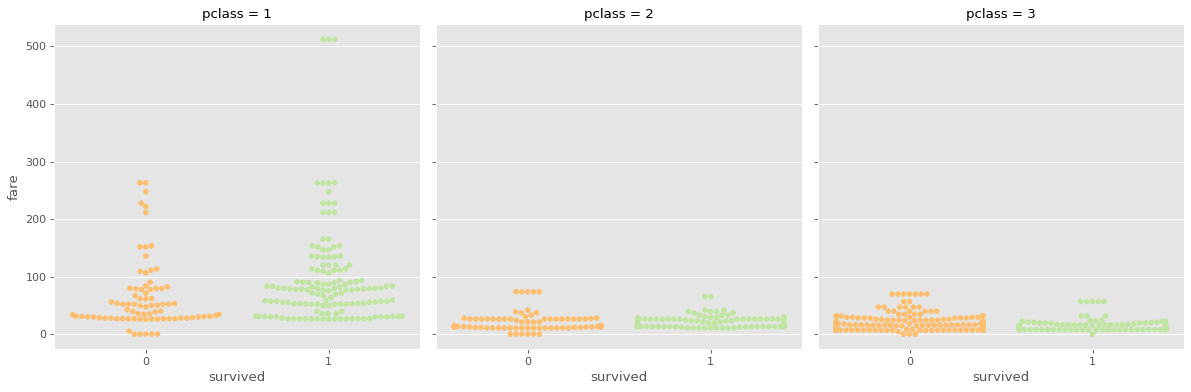

In [62]:
# رسم نمودار زنبوری برای نمایش توزیع کرایه بر اساس وضعیت زنده‌مانده
# با تفکیک داده‌ها بر اساس کلاس مسافری و نمایش جداگانه برای هر کلاس
# میزان مرگ و میر در باقی مسافران وابسته به هزینه پرداختی نبوده
sns.catplot(x='survived', y = 'fare', col='pclass', kind='swarm', data = Data, palette = 'Spectral')

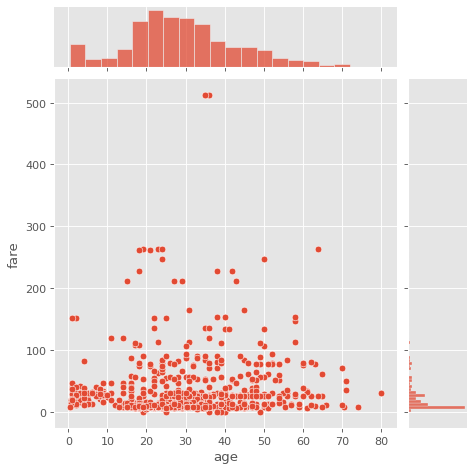

In [63]:
# رسم نمودار مشترک برای نمایش رابطه بین سن و کرایه
# که شامل هیستوگرام‌های هر متغیر در محورهای افقی و عمودی نیز می‌شود
# فارغ از سن، میانگین پرداختی مسافران تقریبا یکسان است
sns.jointplot(x='age',y='fare', data = Data)

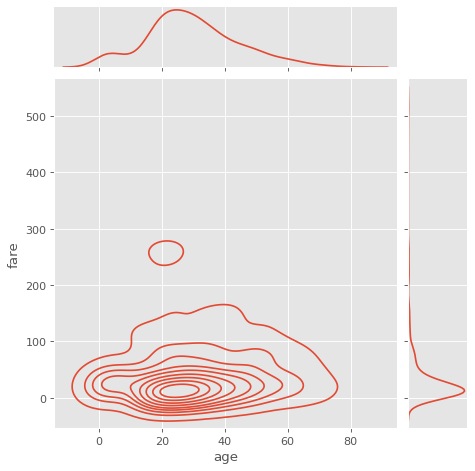

In [64]:
# رسم نمودار مشترک برای نمایش رابطه بین سن و کرایه
# با استفاده از نمودار چگالی احتمال برای نمایش توزیع داده‌ها
# این الگو میانگین مشترکی گرفته که نشان می‌دهد میانگین سنی و پرداخت به ترتیب ۲۳ و ۱۰ واحد پول است
sns.jointplot(x='age', y='fare', data = Data, kind='kde')

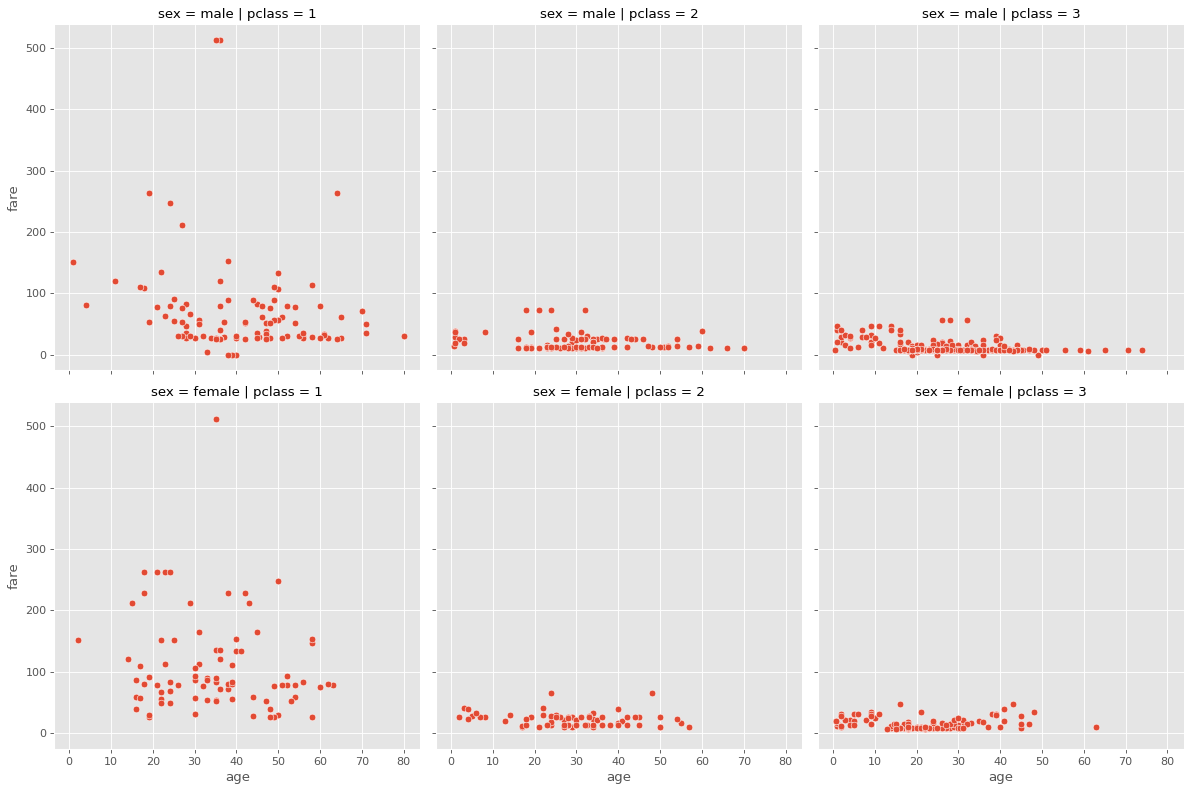

In [65]:
# رسم نمودار پراکندگی برای نمایش رابطه بین سن و کرایه
# با تفکیک داده‌ها بر اساس جنسیت و کلاس مسافری
# هرچه کلاس ضعیفتر میشود یکسانی پرداخت بیشتر و منسجم‌تر می‌شود
sns.relplot(x='age', y='fare',row='sex',col='pclass',data=Data)

###Siblings & Spouses

In [66]:
# شمارش تعداد وقوع هر مقدار در ستون تعداد خواهر و برادر یا همسر
Data['sibsp'].value_counts()

,count
sibsp,
0,608
1,209
2,28
4,18
3,16
8,7
5,5


<Axes: xlabel='sibsp', ylabel='count'>

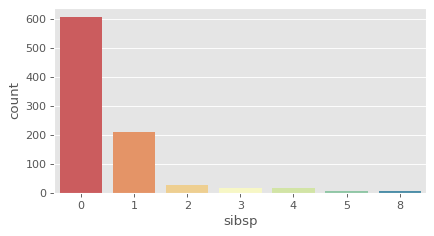

In [67]:
# رسم نمودار میله‌ای برای نمایش تعداد وقوع هر مقدار در ستون تعداد خواهر و برادر یا همسر
sns.countplot(x = 'sibsp',data=Data, palette = 'Spectral')

<Axes: xlabel='sibsp', ylabel='count'>

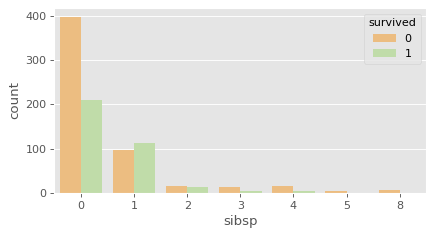

In [68]:
# رسم نمودار میله‌ای برای نمایش تعداد وقوع هر مقدار در ستون تعداد خواهر و برادر یا همسر
# با تفکیک داده‌ها بر اساس وضعیت زنده‌مانده
sns.countplot(x='sibsp', hue='survived', data= Data, palette = 'Spectral')

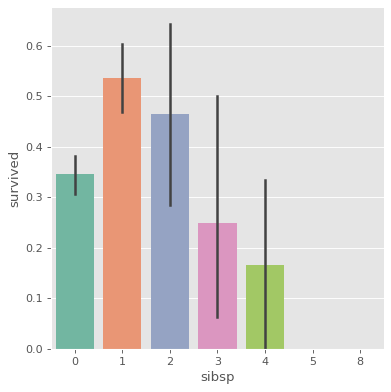

In [69]:
# رسم نمودار میله‌ای برای نمایش میانگین نرخ زنده‌ماندن بر اساس تعداد خواهر و برادر یا همسر
# تعداد کم همشیر و همسر امکان حیات را بیشتر می‌کند
# تنها بودن در شرایط بحرانی احتمال مرگ را زیاد می‌کند
# افزایش تعداد همراهان از یک نسبت به بعد احتمال بقا را کم می‌کند
sns.catplot(x ='sibsp', y = 'survived', kind= 'bar', data = Data, palette = "Set2")

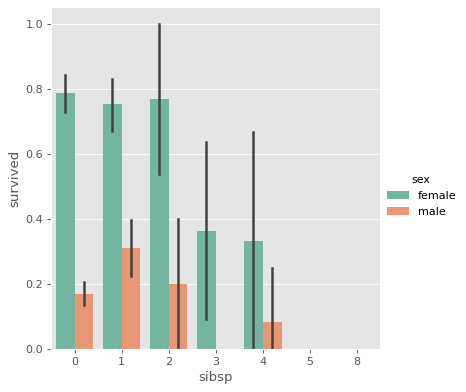

In [70]:
# رسم نمودار میله‌ای برای نمایش میانگین نرخ زنده‌ماندن بر اساس تعداد خواهر و برادر یا همسر
# با تفکیک داده‌ها بر اساس جنسیت
# در شرایط بحرانی مسئولیت نجات اعضای خانواده با مردان است
# احتمال به خطر افتادن مردان به نسبت زنان بیشتر است
sns.catplot(x ='sibsp', y = 'survived',hue='sex', kind= 'bar', data = Data, palette = "Set2")

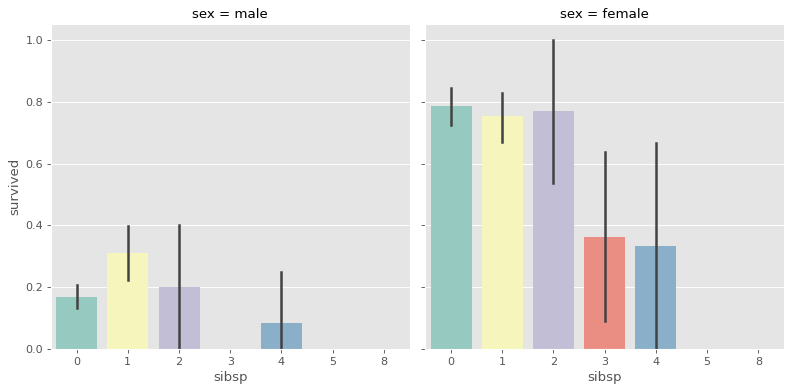

In [71]:
# رسم نمودار میله‌ای برای نمایش میانگین نرخ زنده‌ماندن بر اساس تعداد خواهر و برادر یا همسر
# با تفکیک داده‌ها بر اساس جنسیت و نمایش جداگانه برای هر جنسیت
sns.catplot(x ='sibsp', y = 'survived',col='sex', kind= 'bar', data = Data, palette = "Set3")

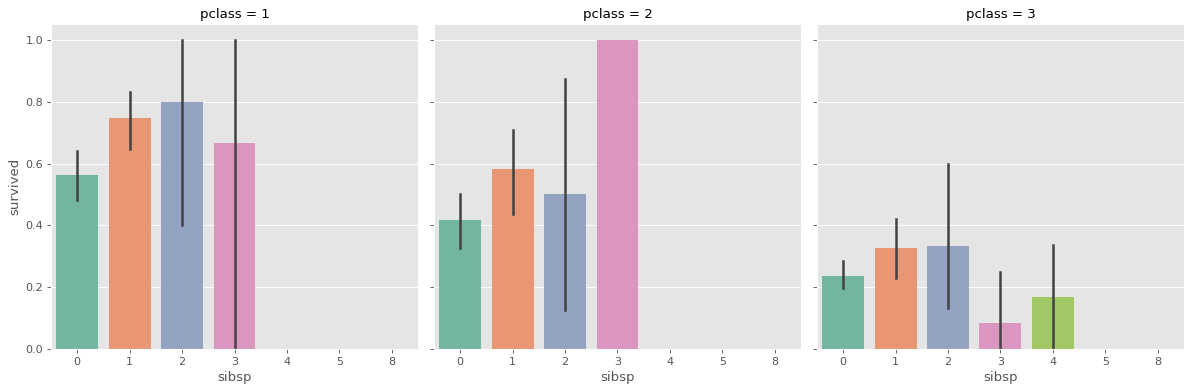

In [72]:
# رسم نمودار میله‌ای برای نمایش میانگین نرخ زنده‌ماندن بر اساس تعداد خواهر و برادر یا همسر
# با تفکیک داده‌ها بر اساس کلاس مسافری و نمایش جداگانه برای هر کلاس
# هرچه کلاس‌ ضعیف‌تز باشد تعداد اعضای خانواده بیشتر است
# کلاس طبقاتی خانواده بر احتمال نجات شان تاثیر دارد
sns.catplot(x ='sibsp', y = 'survived',col='pclass', kind= 'bar', data = Data, palette = "Set2")

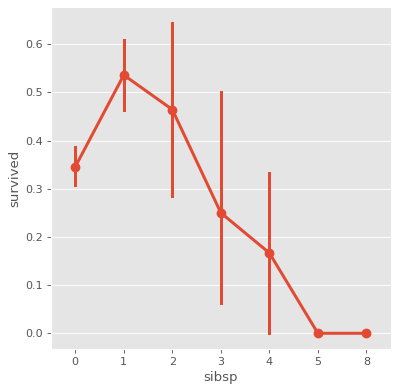

In [73]:
# رسم نمودار نقطه‌ای برای نمایش میانگین نرخ زنده‌ماندن بر اساس تعداد خواهر و برادر یا همسر
# تنها بودن و یا حضور در گروه پرجمعیت شانس بقا را کاهش می‌دهد
sns.catplot(x='sibsp', y = 'survived', kind='point', data = Data)

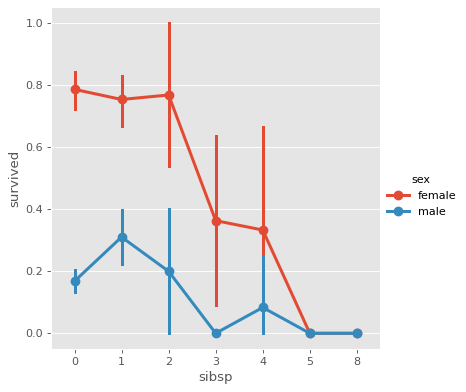

In [74]:
# رسم نمودار نقطه‌ای برای نمایش میانگین نرخ زنده‌ماندن بر اساس تعداد خواهر و برادر یا همسر
# با تفکیک داده‌ها بر اساس جنسیت
sns.catplot(x='sibsp', y = 'survived',hue='sex', kind='point', data = Data)

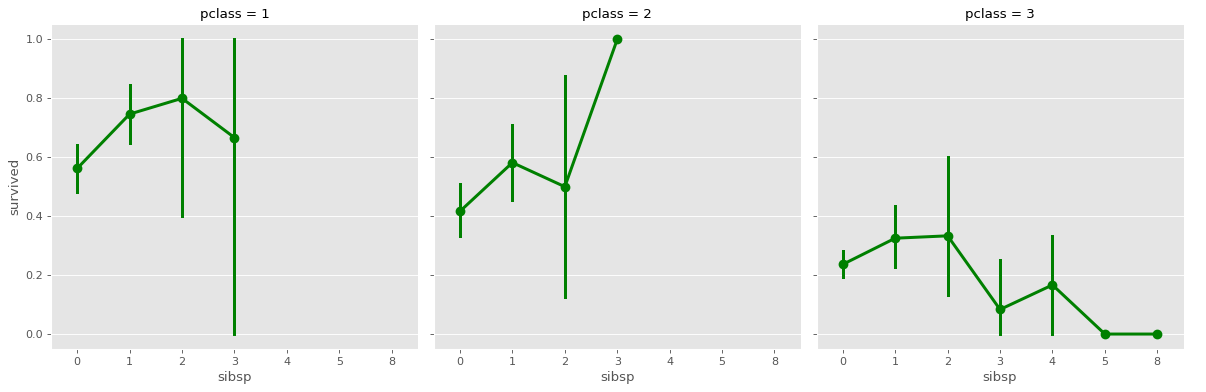

In [75]:
# رسم نمودار نقطه‌ای برای نمایش میانگین نرخ زنده‌ماندن بر اساس تعداد خواهر و برادر یا همسر
# با تفکیک داده‌ها بر اساس کلاس مسافری و نمایش جداگانه برای هر کلاس
sns.catplot(x='sibsp', y = 'survived',col='pclass', kind='point', data = Data, color='green')

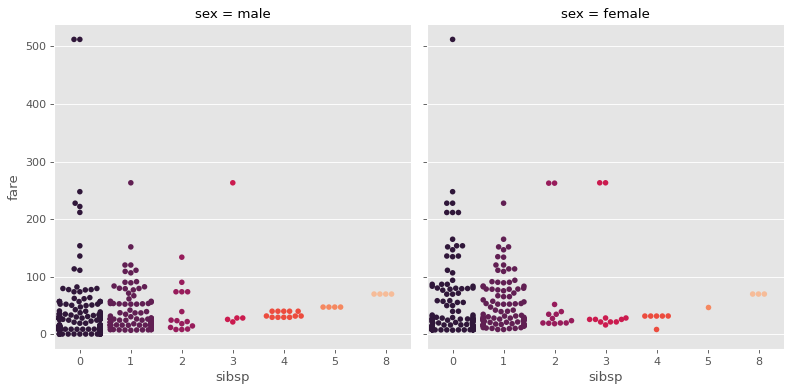

In [76]:
# رسم نمودار زنبوری برای نمایش رابطه بین تعداد خواهر و برادر یا همسر و کرایه
# با تفکیک داده‌ها بر اساس جنسیت و نمایش جداگانه برای هر جنسیت
# از خانواده‌های پرجمعیت کرایه بیشتری دریافت شده
sns.catplot(x='sibsp',y='fare', col='sex',data=Data, kind='swarm',palette='rocket')

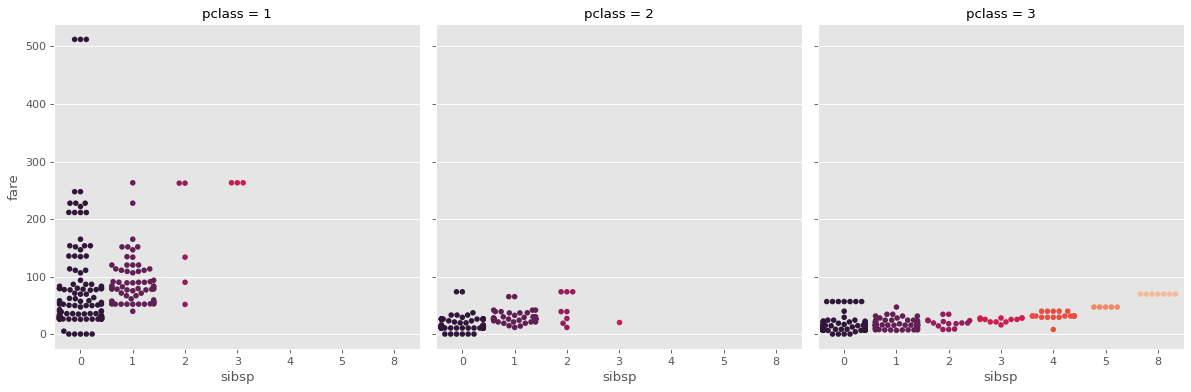

In [77]:
# رسم نمودار زنبوری برای نمایش رابطه بین تعداد خواهر و برادر یا همسر و کرایه
# با تفکیک داده‌ها بر اساس کلاس مسافری و نمایش جداگانه برای هر کلاس
# هر چه کلاس اجتماعی پایین‌تر باشد نرخ زاد و ولد بیشتر است
sns.catplot(x='sibsp',y='fare', col='pclass',data=Data, kind='swarm',palette='rocket')

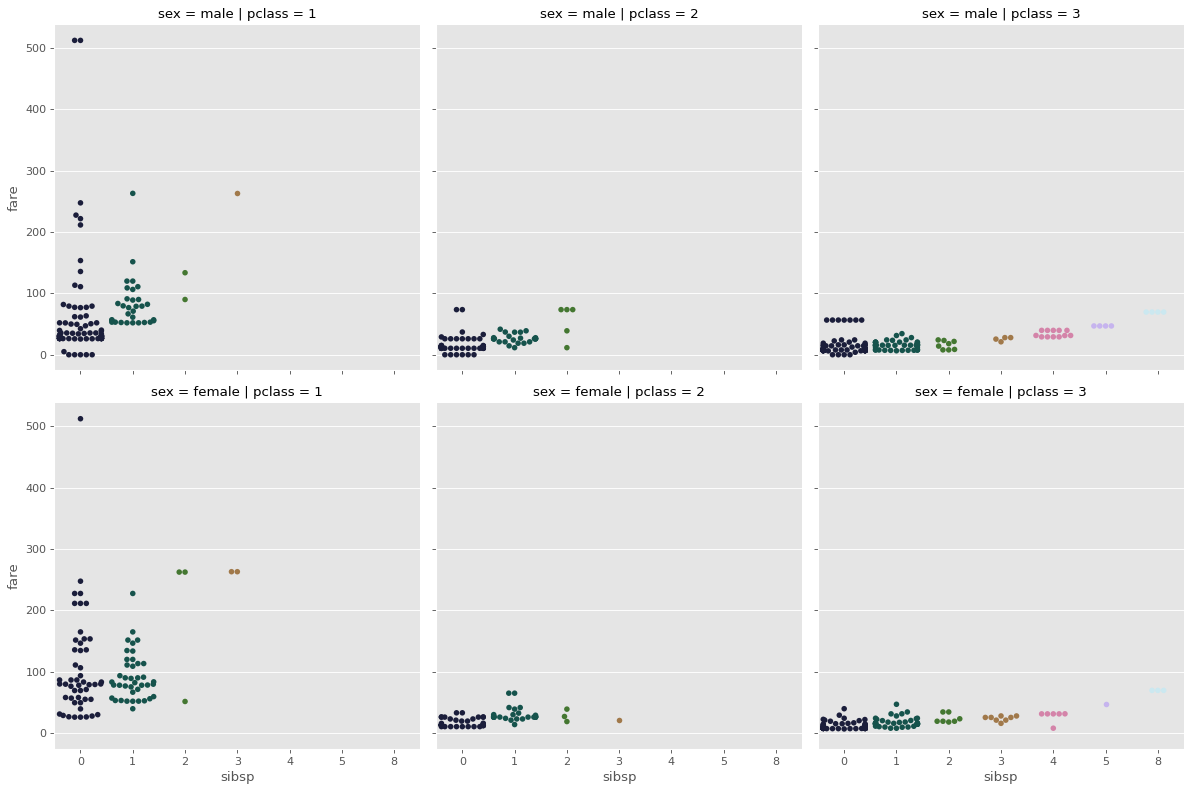

In [78]:
# رسم نمودار زنبوری برای نمایش رابطه بین تعداد خواهر و برادر یا همسر و کرایه
# با تفکیک داده‌ها بر اساس جنسیت در سطرها و کلاس مسافری در ستون‌ها
sns.catplot(x='sibsp',y='fare', col='pclass', row='sex',data=Data, kind='swarm',palette='cubehelix')

###Parents & Children

In [79]:
# شمارش تعداد وقوع هر مقدار در ستون تعداد والدین یا فرزندان همراه مسافر
Data['parch'].value_counts()

,count
parch,
0,678
1,118
2,80
5,5
3,5
4,4
6,1


<Axes: xlabel='parch', ylabel='count'>

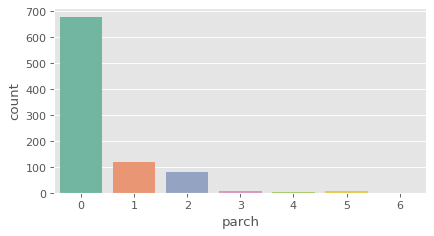

In [80]:
# رسم نمودار میله‌ای برای نمایش تعداد وقوع هر مقدار در ستون تعداد والدین یا فرزندان همراه مسافر
sns.countplot(x='parch',data=Data, palette='Set2')

<Axes: xlabel='parch', ylabel='count'>

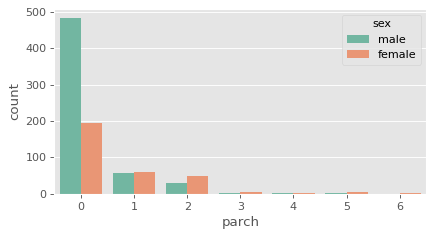

In [81]:
# رسم نمودار میله‌ای برای نمایش تعداد وقوع هر مقدار در ستون تعداد والدین یا فرزندان همراه مسافر
# با تفکیک داده‌ها بر اساس جنسیت
sns.countplot(x='parch',hue='sex',data=Data, palette='Set2')

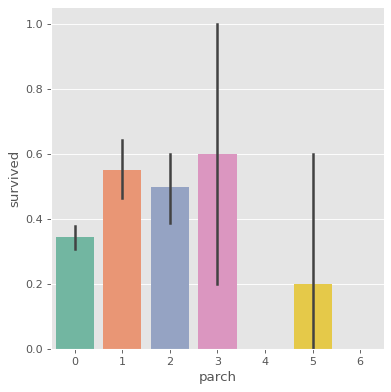

In [82]:
# رسم نمودار میله‌ای برای نمایش میانگین نرخ زنده‌ماندن بر اساس تعداد والدین یا فرزندان همراه مسافر
# امکان زنده ماندن درصورت بودن در کنار والدین بالاتر می‌رود
# احتمال نجات تمام اعضای خانواده پرجمعیت کمتر می‌شود
# افراد بدون همراه احتمال نجات کمتری دارند
sns.catplot(x='parch',y='survived',data=Data, palette='Set2', kind='bar')

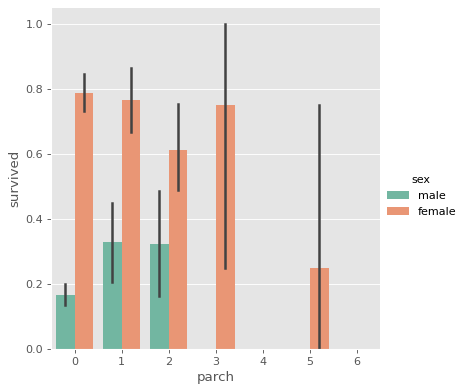

In [83]:
# رسم نمودار میله‌ای برای نمایش میانگین نرخ زنده‌ماندن بر اساس تعداد والدین یا فرزندان همراه مسافر
# با تفکیک داده‌ها بر اساس جنسیت
# مردان در هر حالتی شانس بقای کمتری داشته‌اند
sns.catplot(x='parch',y='survived',hue='sex',data=Data, palette='Set2', kind='bar')

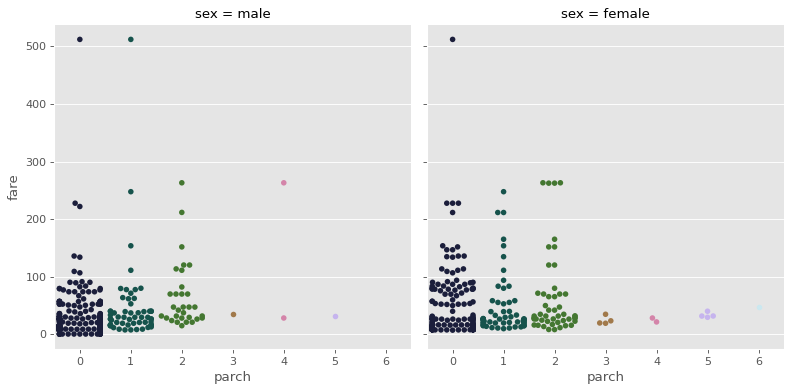

In [84]:
# رسم نمودار زنبوری برای نمایش رابطه بین تعداد والدین یا فرزندان همراه مسافر و کرایه
# با تفکیک داده‌ها بر اساس جنسیت و نمایش جداگانه برای هر جنسیت
sns.catplot(x='parch',y='fare', col='sex',data=Data,kind='swarm',palette='cubehelix')

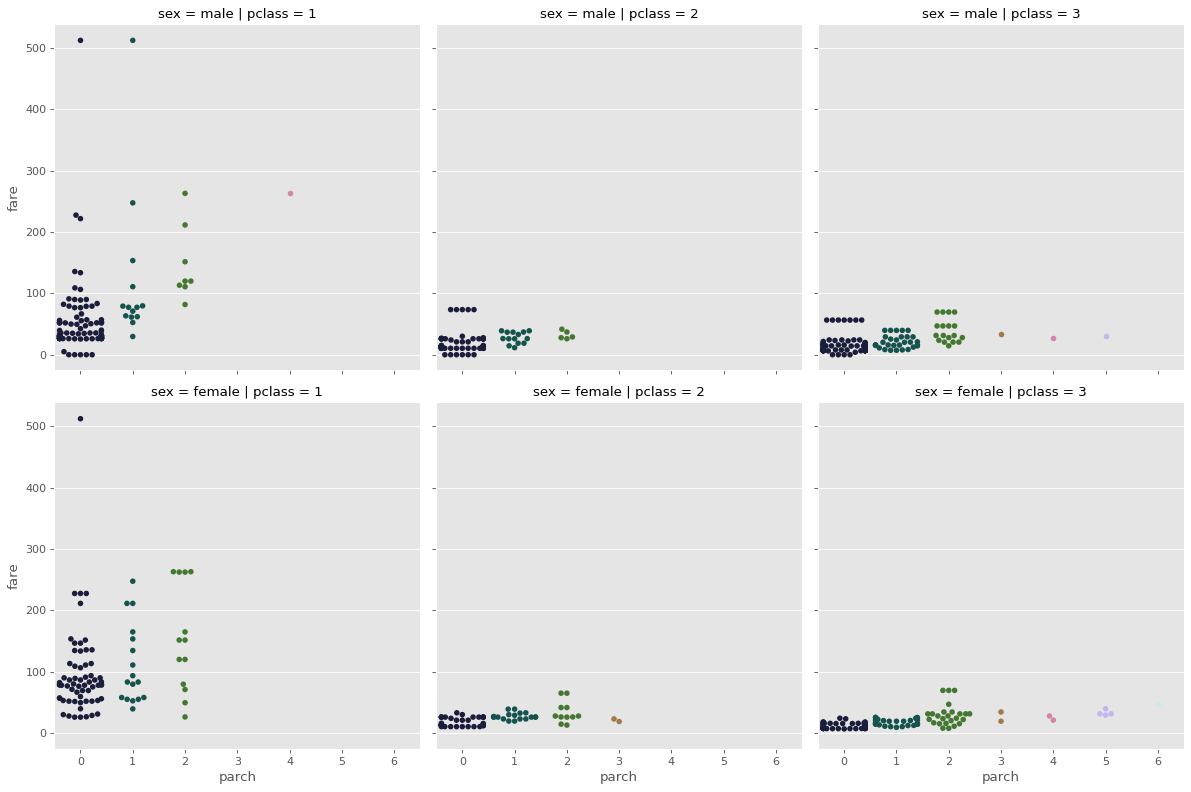

In [85]:
# رسم نمودار زنبوری برای نمایش رابطه بین تعداد والدین یا فرزندان همراه مسافر و کرایه
# با تفکیک داده‌ها بر اساس جنسیت در سطرها و کلاس مسافری در ستون‌ها
sns.catplot(x='parch',y='fare', col='pclass', row='sex',data=Data,kind='swarm',palette='cubehelix')

###Embarked

Port of embarkation:
1.   C = Cherbourg
2.   Q = Queenstown
3.   S = Southhampton



In [86]:
# شمارش تعداد وقوع هر مقدار در ستون محل سوار شدن
Data['embarked'].value_counts()

,count
embarked,
S,644
C,168
Q,77


<Axes: xlabel='embarked', ylabel='count'>

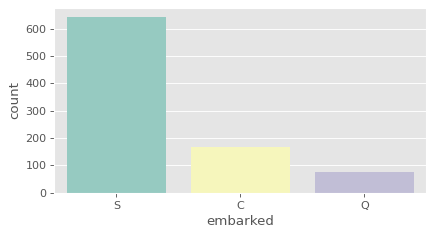

In [87]:
# رسم نمودار میله‌ای برای نمایش تعداد مسافران براساس یکی از سه بندر
sns.countplot(x='embarked', data= Data, palette='Set3')

<Axes: xlabel='embarked', ylabel='count'>

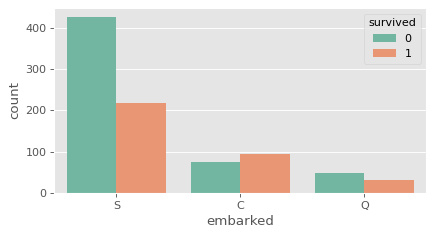

In [88]:
# رسم نمودار میله‌ای برای نمایش تعداد وقوع هر مقدار در ستون محل سوار شدن
# با تفکیک داده‌ها بر اساس وضعیت زنده‌مانده
sns.countplot(x='embarked',hue='survived', data= Data, palette='Set2')

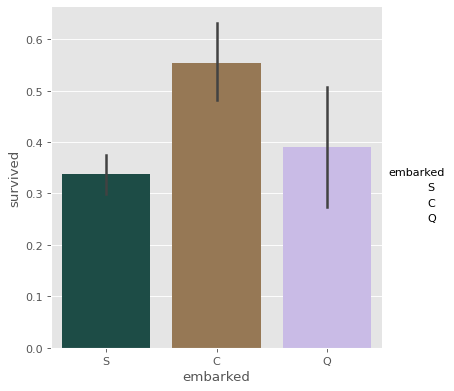

In [89]:
# رسم نمودار میله‌ای برای نمایش میانگین نرخ زنده‌ماندن بر اساس محل سوار شدن
sns.catplot(x='embarked',y='survived',kind='bar', data = Data, palette='cubehelix')

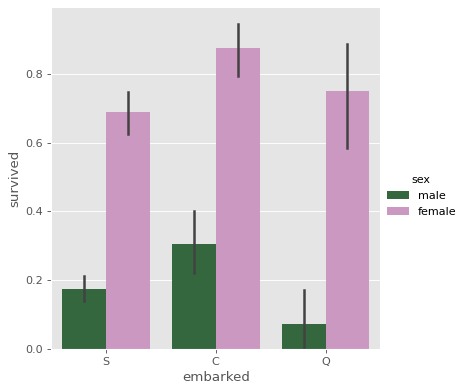

In [90]:
# رسم نمودار میله‌ای برای نمایش میانگین نرخ زنده‌ماندن بر اساس محل سوار شدن
# با تفکیک داده‌ها بر اساس جنسیت
# محل سوار شدن در کشتی در نرخ بقای زن‌ها تاثیر بسیار کمتری نسبت به مردان داشته
sns.catplot(x='embarked',y='survived',hue='sex',kind='bar', data = Data, palette='cubehelix')

<Axes: xlabel='embarked', ylabel='count'>

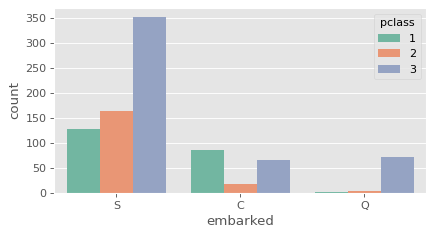

In [91]:
# رسم نمودار میله‌ای برای نمایش تعداد وقوع هر مقدار در ستون محل سوار شدن
# با تفکیک داده‌ها بر اساس کلاس مسافری
# بیشترین مسافر از ایستگاه اس سوار شده و اکثریت آن نیز از کلاس اقتصادی هستند
# با توجه به نمودارها، تنها ایستگاهی که بیشتری مسافر از کلاس لوکس را داشته بیشترین نسبت بازمانده را نیز داشته است
sns.countplot(x='embarked',hue='pclass', data= Data, palette='Set2')

###Who

In [92]:
# شمارش تعداد وقوع هر مقدار در ستون وضعیت مسافر (زن مرد و کودک)
Data.who.value_counts()

,count
who,
man,537
woman,271
child,83


<Axes: xlabel='who', ylabel='count'>

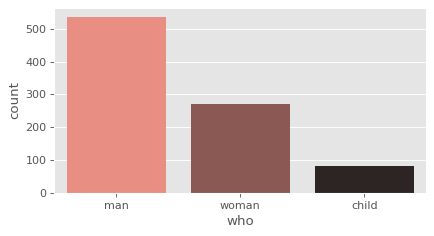

In [93]:
# رسم نمودار میله‌ای برای نمایش تعداد وقوع هر مقدار در ستون وضعیت مسافر
# کودکان اقلیت جمعیت مسافران و مردان بالغ اکثریت جمعیت را شکل داده‌اند
sns.countplot(x='who',data=Data,palette='dark:salmon_r')

<Axes: xlabel='who', ylabel='count'>

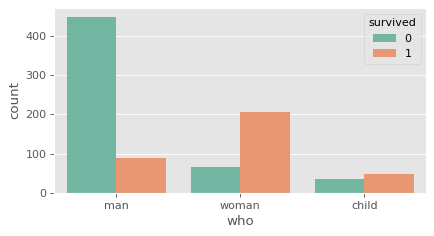

In [94]:
# رسم نمودار میله‌ای برای نمایش تعداد وقوع هر مقدار در ستون وضعیت مسافر
# با تفکیک داده‌ها بر اساس وضعیت زنده‌مانده
# زنان به نسبت جمعیت خود بیشترین میزان شانس حیات و مردها کمترین میزان را داشتند
sns.countplot(x='who',hue='survived',data=Data,palette='Set2')

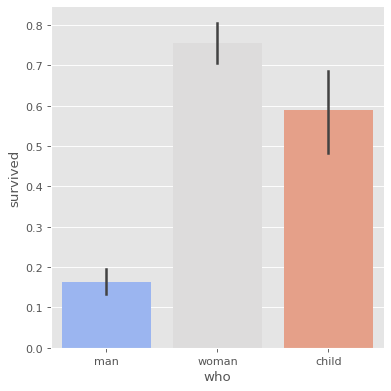

In [95]:
# رسم نمودار میله‌ای برای نمایش میانگین نرخ زنده‌ماندن بر اساس وضعیت مسافر
# کودکان و زنان در اولویت نجات بودند
sns.catplot(x='who', y='survived',kind='bar',data=Data, palette="coolwarm")

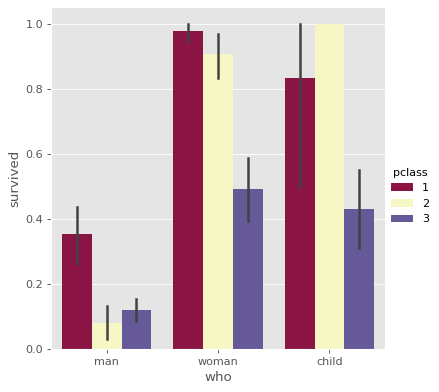

In [96]:
# رسم نمودار میله‌ای برای نمایش میانگین نرخ زنده‌ماندن بر اساس وضعیت مسافر
# با تفکیک داده‌ها بر اساس کلاس مسافری
# متاسفانه کلاس مسافر حتی در نحوه نجات کودکان نیز تاثیر داشته است
sns.catplot(x='who', y='survived',hue='pclass',kind='bar',data=Data, palette="Spectral")

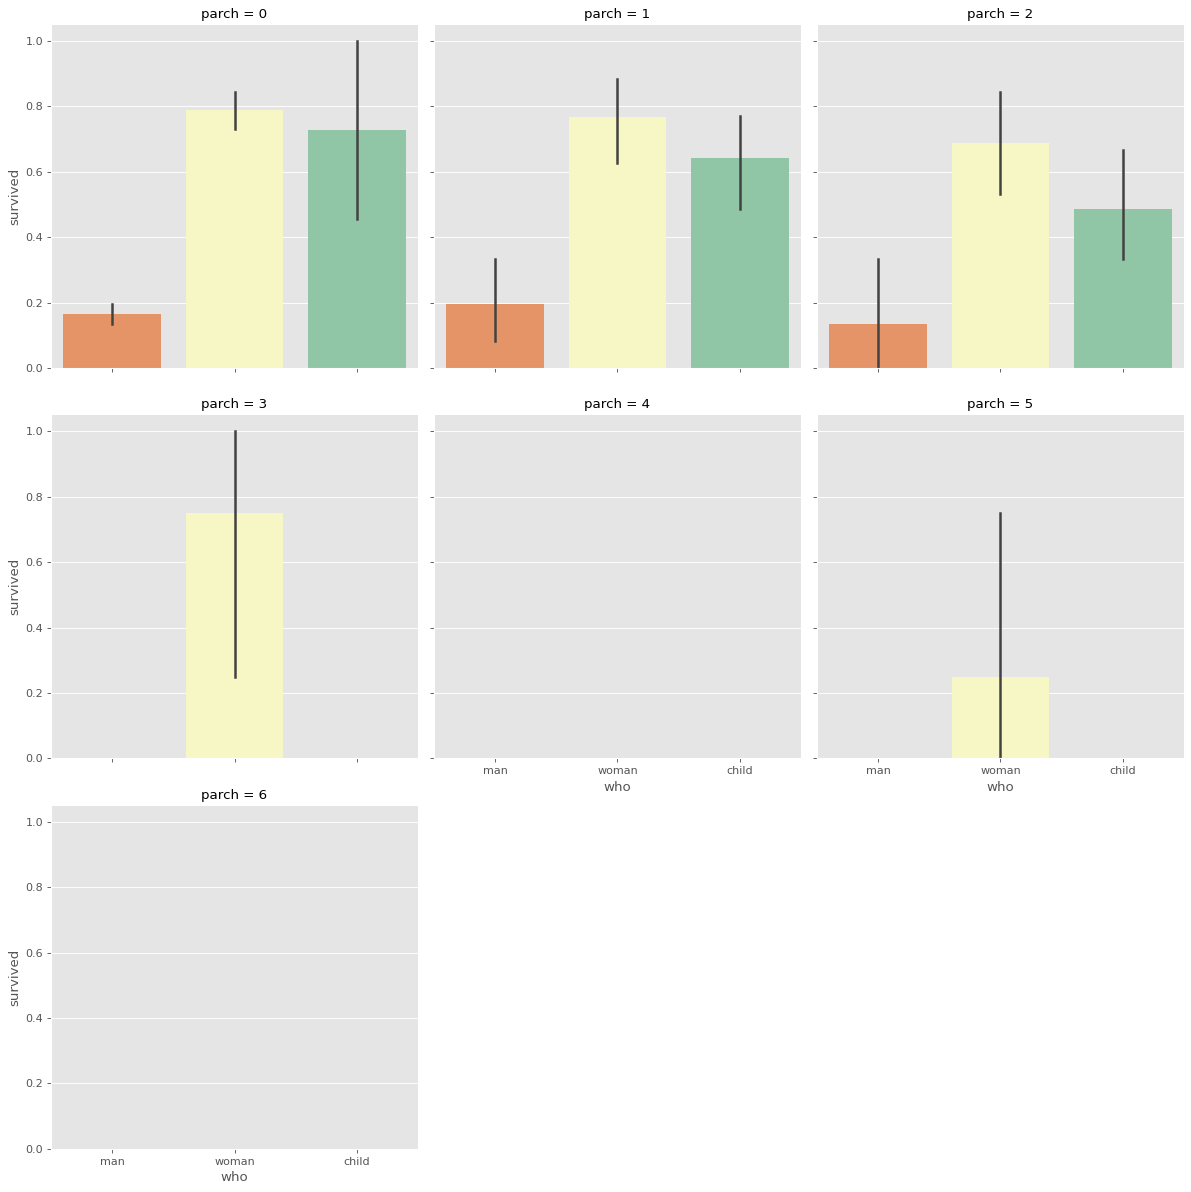

In [97]:
# رسم نمودار میله‌ای برای نمایش میانگین نرخ زنده‌ماندن  بر اساس وضعیت مسافر
# با تفکیک داده‌ها بر اساس تعداد والدین یا فرزندان همراه مسافر و نمایش جداگانه برای هر مقدار
sns.catplot(x='who', y='survived',col='parch',col_wrap=3,kind='bar',data=Data, palette="Spectral")